In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score   
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report as cls_report
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM

In [60]:
train_df=pd.read_csv('/Users/siri/Downloads/train_255.csv')
test_df=pd.read_csv('/Users/siri/Downloads/test_255.csv')

In [61]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [62]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [63]:
train_df.isnull().values.any(), test_df.isnull().values.any()

(False, False)

In [64]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


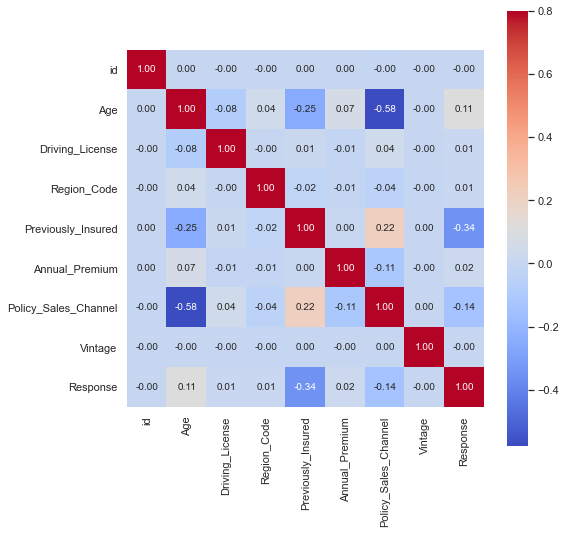

In [66]:
matrix = train_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, vmax=.8, square=True,annot=True, fmt= '.2f', cbar=True, annot_kws={'size': 10}, cmap="coolwarm");

<AxesSubplot:xlabel='Response', ylabel='count'>

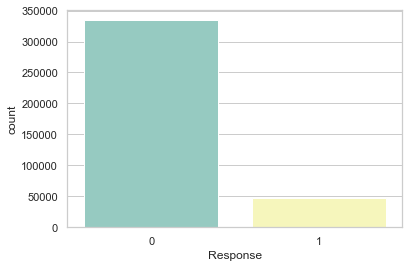

In [42]:
sns.countplot(x=train_df['Response'],palette="Set3")

<AxesSubplot:xlabel='Gender', ylabel='count'>

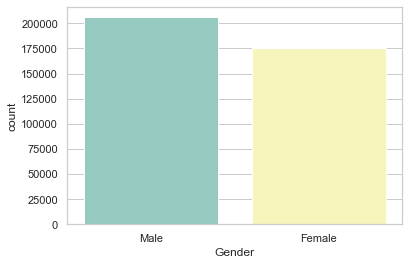

In [41]:
sns.countplot(x=train_df['Gender'],palette="Set3")

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

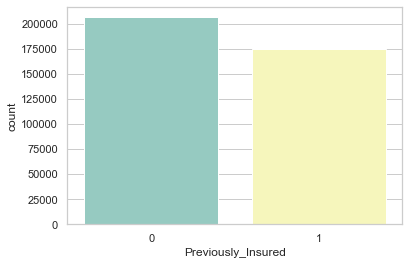

In [40]:
sns.countplot(x=train_df['Previously_Insured'],palette="Set3")

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

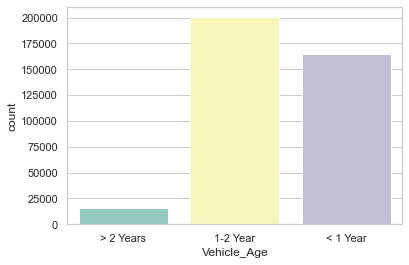

In [39]:
sns.countplot(x=train_df['Vehicle_Age'],palette="Set3")

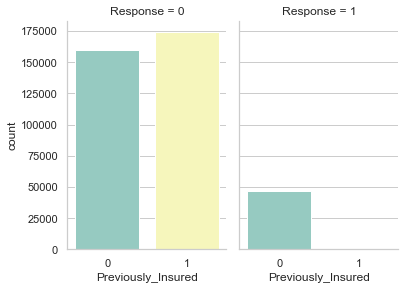

In [33]:
g = sns.catplot(x="Previously_Insured", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

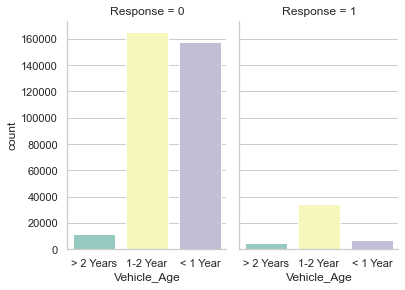

In [34]:
g = sns.catplot(x="Vehicle_Age", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

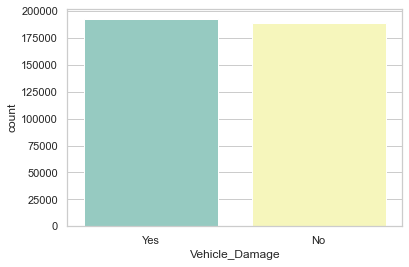

In [38]:
sns.countplot(x=train_df['Vehicle_Damage'],palette="Set3")

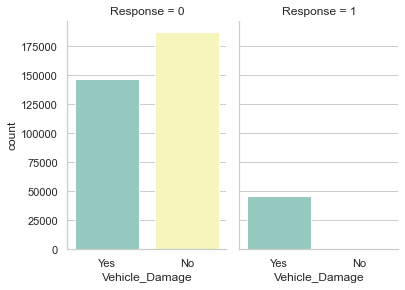

In [37]:
g = sns.catplot(x="Vehicle_Damage", col="Response",
                data=train_df, kind="count",
                height=4, aspect=.7,palette="Set3");

In [54]:
gender_coder = {'Male':1, 'Female':0} ## one hot encoding of the nominal diagnosis values
train_df.Gender = train_df.Gender.map(gender_coder)
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [55]:
train_df = pd.get_dummies(train_df, columns=['Vehicle_Age','Vehicle_Damage'])

In [56]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,0,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,1,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,0,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,1,0


In [57]:
min_max = MinMaxScaler()
train_df[['Annual_Premium']] = min_max.fit_transform(train_df[['Annual_Premium']])

In [58]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,0.070366,26.0,217,1,0,0,1,0,1
1,2,1,76,1,3.0,0,0.057496,26.0,183,0,1,0,0,1,0
2,3,1,47,1,28.0,0,0.066347,26.0,27,1,0,0,1,0,1
3,4,1,21,1,11.0,1,0.048348,152.0,203,0,0,1,0,1,0
4,5,0,29,1,41.0,1,0.046259,152.0,39,0,0,1,0,1,0
